# Reconnaissance d’écriture par réseaux de neurones
## Chargement de la base de données digits disponible sous sklearn

In [14]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn import *
from sklearn.linear_model import *
from sklearn.neural_network import *
digits = load_digits()

## Affichage d'une image

<Figure size 432x288 with 0 Axes>

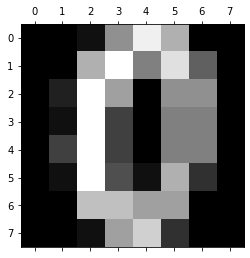

In [15]:
plt.gray()
plt.matshow(digits.images[10])
plt.show()

## Récupération des données et des labels

In [16]:
X = digits.data
y = digits.target

## Affichage du nombre d'exemples par classe

In [17]:
print("Il y a ", y.size , "exemples en tout dans le dataset dont :")
[print ( digits.data[digits.target == a].shape[0], "exemples d'images de",a) for a in list(range(10))]


Il y a  1797 exemples en tout dans le dataset dont :
178 exemples d'images de 0
182 exemples d'images de 1
177 exemples d'images de 2
183 exemples d'images de 3
181 exemples d'images de 4
182 exemples d'images de 5
181 exemples d'images de 6
179 exemples d'images de 7
174 exemples d'images de 8
180 exemples d'images de 9


[None, None, None, None, None, None, None, None, None, None]

## Dimensionalité des données

In [18]:
print("les données ont", X.shape[1], "dimensions")
print("Chaque dimension correspond à un pixel, qui peut prendre les valeurs:",np.unique(X))

les données ont 64 dimensions
Chaque dimension correspond à un pixel, qui peut prendre les valeurs: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


## Séparation en base d'apprentissage et base de test

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)

## Etude de l'influence du nombre de neurones de la couche cachée sur le résultat (attention, ce calcul prends approximativement 30 minutes d'éxécution)

In [ ]:
clfArray = []
clfResults = []
i = 0;
for numNeuroneCache in range(4,27,3):
    clfArray.append(MLPClassifier(hidden_layer_sizes=numNeuroneCache,max_iter=500, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1))
    clfArray[i].fit(X_train,y_train)
    clfResults.append(clfArray[i].score(X_test,y_test))
    i += 1


## Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance

ValueError: x and y must have same first dimension, but have shapes (16,) and (12,)

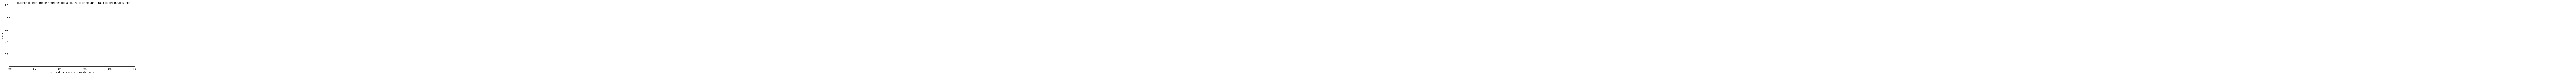

In [13]:
plt.figure(figsize=(10,5))
plt.title("Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance")
plt.ylabel('score')
plt.xlabel('nombre de neurones de la couche cachée')
plt.annotate('nombre de neurones = 16, score = ' + str(clfResults[5]) , xy= (16,clfResults[5]), xytext=( 20,0.9) ,arrowprops=dict(facecolor='black', shrink=0.05),)

plt.plot(list(range(4,50,3)),clfResults)

## Cross-validation

In [1]:
clfResults

NameError: name 'clfResults' is not defined

In [23]:

clfCV = MLPClassifier(hidden_layer_sizes=10, activation='tanh',max_iter=500, solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1)
clfCV.fit(X_train,y_train)
clfCV.score(X_test,y_test)

Iteration 1, loss = 1.69190079
Iteration 2, loss = 1.15238069
Iteration 3, loss = 0.87410008
Iteration 4, loss = 0.74708089
Iteration 5, loss = 0.72218312
Iteration 6, loss = 0.62405483
Iteration 7, loss = 0.67061258
Iteration 8, loss = 0.58995723
Iteration 9, loss = 0.46994461
Iteration 10, loss = 0.53182800
Iteration 11, loss = 0.53644486
Iteration 12, loss = 0.41228371
Iteration 13, loss = 0.53902370
Iteration 14, loss = 0.45758972
Iteration 15, loss = 0.37682150
Iteration 16, loss = 0.38948021
Iteration 17, loss = 0.49496186
Iteration 18, loss = 0.51813025
Iteration 19, loss = 0.47041690
Iteration 20, loss = 0.34600172
Iteration 21, loss = 0.49477342
Iteration 22, loss = 0.42022200
Iteration 23, loss = 0.51763144
Iteration 24, loss = 0.52078817
Iteration 25, loss = 0.52871032
Iteration 26, loss = 0.47011087
Iteration 27, loss = 0.38394123
Iteration 28, loss = 0.31196329
Iteration 29, loss = 0.37613897
Iteration 30, loss = 0.39149325
Iteration 31, loss = 0.32262947
Iteration 32, los

0.9259259259259259

In [21]:
list (range(4,50,3))

[4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]